In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [13]:
(X_train, y_train) , (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [14]:
X_train.shape

(50000, 32, 32, 3)

In [15]:
X_test.shape

(10000, 32, 32, 3)

In [16]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [17]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [18]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "horse", "ship", "truck"]

In [19]:
classes[9]

'ship'

In [20]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

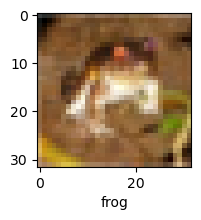

In [21]:
plot_sample(X_train, y_train, 0)

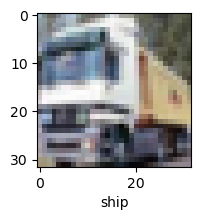

In [22]:
plot_sample(X_train, y_train, 1)

In [25]:
X_train= X_train /255
X_test= X_test /255

In [26]:
from tensorflow import keras

In [27]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000,activation="relu"),
    keras.layers.Dense(1000,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid"),
    
])
model.compile(optimizer = "SGD",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=1)

1563/1563 [==============================] - 83s 52ms/step - loss: 1.8162 - accuracy: 0.3527


In [28]:
import tensorflow as tf

In [29]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 6s 18ms/step - loss: 1.7043 - accuracy: 0.4013


[1.7042747735977173, 0.40130001306533813]

In [32]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print ("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 5s 16ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.35      0.65      0.46      1000
           1       0.50      0.47      0.49      1000
           2       0.33      0.26      0.29      1000
           3       0.41      0.10      0.16      1000
           4       0.35      0.35      0.35      1000
           5       0.40      0.29      0.34      1000
           6       0.35      0.64      0.45      1000
           7       0.59      0.32      0.42      1000
           8       0.40      0.65      0.50      1000
           9       0.57      0.28      0.38      1000

    accuracy                           0.40     10000
   macro avg       0.43      0.40      0.38     10000
weighted avg       0.43      0.40      0.38     10000



## CNN

In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models



In [35]:

cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters =33, kernel_size=(3,3), activation="relu", input_shape =(32,32,3)),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(filters =64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    #dense
    
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax"),
  
    
])


In [36]:
cnn.compile(optimizer = "adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])



In [38]:
cnn.fit(X_train, y_train, epochs=1)

1563/1563 [==============================] - 36s 22ms/step - loss: 1.4641 - accuracy: 0.4718


In [39]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.2055 - accuracy: 0.5762


[1.2055048942565918, 0.576200008392334]

In [40]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

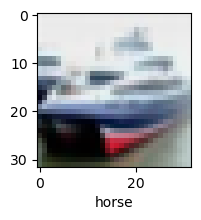

In [41]:
plot_sample(X_test, y_test, 1)

In [42]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 7ms/step


array([[1.0725188e-02, 7.6775420e-03, 7.6793008e-02, 3.7976313e-01,
        6.4277588e-03, 3.2179439e-01, 1.3073774e-01, 2.4107210e-03,
        5.5765908e-02, 7.9046460e-03],
       [8.3538376e-02, 4.0559870e-01, 1.7997980e-04, 4.5692841e-06,
        2.9206529e-05, 2.9613591e-06, 3.0695833e-06, 2.1711187e-06,
        4.7859508e-01, 3.2045808e-02],
       [1.2361546e-01, 2.1478820e-01, 1.6328488e-02, 2.7993638e-03,
        1.3508312e-03, 2.4753825e-03, 1.0089846e-03, 1.2351532e-03,
        5.7268184e-01, 6.3716345e-02],
       [4.3926099e-01, 5.9473567e-02, 9.6884863e-03, 3.1031639e-04,
        7.2188576e-04, 1.6157265e-04, 1.0256642e-03, 2.2894927e-04,
        4.8347196e-01, 5.6565572e-03],
       [1.3245869e-03, 6.6434941e-03, 7.2533011e-02, 1.4376479e-01,
        1.9748412e-01, 1.2869333e-01, 4.3389556e-01, 7.8164078e-03,
        5.4252879e-03, 2.4193306e-03]], dtype=float32)

In [43]:
y_classes = [np.argmax(i) for i in y_pred]
y_classes[:5]

[3, 8, 8, 8, 6]

In [44]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

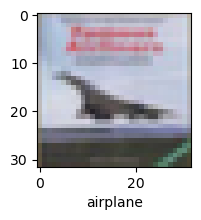

In [47]:
plot_sample(X_test, y_test, 3)

In [48]:
classes[y_classes[3]]

'horse'

In [49]:
print ("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.67      0.64      1000
           1       0.56      0.86      0.68      1000
           2       0.50      0.41      0.45      1000
           3       0.51      0.27      0.36      1000
           4       0.67      0.32      0.43      1000
           5       0.40      0.68      0.50      1000
           6       0.66      0.69      0.68      1000
           7       0.67      0.61      0.64      1000
           8       0.71      0.68      0.69      1000
           9       0.63      0.57      0.60      1000

    accuracy                           0.58     10000
   macro avg       0.59      0.58      0.57     10000
weighted avg       0.59      0.58      0.57     10000

